### Stock Market Prediction And Forecasting Using Stacked LSTM

#### Keras and Tensorflow >2.0

In [1]:
### Data Collection
import pandas_datareader as pdr


In [2]:
key="57d73181a4657ccec0f4a2907847ffb3207c7fec"

In [3]:
import os 
os.chdir(r"C:/Users/sagar/joyjeet sir's notebooks")

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
df.to_csv('AAPL.csv')  # we can fetch only 50 rows

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.shape

(1258, 14)

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-08 00:00:00+00:00,118.23,118.60,116.860,117.52,34309450,27.380718,27.466406,27.063442,27.216290,137237800,0.0,1.0
1,AAPL,2015-12-09 00:00:00+00:00,115.62,117.69,115.080,117.64,46361357,26.776272,27.255660,26.651214,27.244081,185445428,0.0,1.0
2,AAPL,2015-12-10 00:00:00+00:00,116.17,116.94,115.510,116.04,29212727,26.903646,27.081969,26.750797,26.873539,116850908,0.0,1.0
3,AAPL,2015-12-11 00:00:00+00:00,113.18,115.39,112.851,115.19,46886161,26.211196,26.723006,26.135003,26.676689,187544644,0.0,1.0
4,AAPL,2015-12-14 00:00:00+00:00,112.48,112.68,109.790,112.18,65003609,26.049084,26.095401,25.426110,25.979607,260014436,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.97,169410176,119.05,120.9700,116.81,116.97,169410176,0.0,1.0
1254,AAPL,2020-12-01 00:00:00+00:00,122.72,123.4693,120.01,121.01,125920963,122.72,123.4693,120.01,121.01,125920963,0.0,1.0
1255,AAPL,2020-12-02 00:00:00+00:00,123.08,123.3700,120.89,122.02,89004195,123.08,123.3700,120.89,122.02,89004195,0.0,1.0
1256,AAPL,2020-12-03 00:00:00+00:00,122.94,123.7800,122.21,123.52,78967630,122.94,123.7800,122.21,123.52,78967630,0.0,1.0
1257,AAPL,2020-12-04 00:00:00+00:00,122.25,122.8608,121.52,122.60,78260421,122.25,122.8608,121.52,122.60,78260421,0.0,1.0


## Closing Price  

In [11]:
df1=df.reset_index()['close']

In [12]:
df1

0       118.23
1       115.62
2       116.17
3       113.18
4       112.48
         ...  
1253    119.05
1254    122.72
1255    123.08
1256    122.94
1257    122.25
Name: close, Length: 1258, dtype: float64

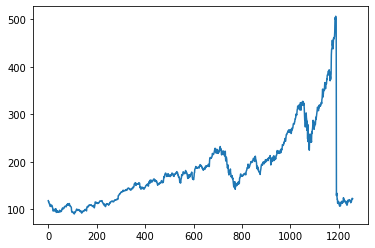

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

## Transforming the data 

In [14]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [15]:
import numpy as np

In [16]:
df1

0       118.23
1       115.62
2       116.17
3       113.18
4       112.48
         ...  
1253    119.05
1254    122.72
1255    123.08
1256    122.94
1257    122.25
Name: close, Length: 1258, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))  # transfer between 0 to 1 
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.06708358]
 [0.06080577]
 [0.06212868]
 ...
 [0.07874925]
 [0.07841251]
 [0.07675286]]


## Data Partition 

In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)   ### i am just taking the train size == 1258 * 0.65  == 817
test_size=len(df1)-training_size   ### length of total length - train size    == 441
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]  ### take data from 0 to 817 as train  

In [20]:
training_size,test_size

(817, 441)

In [21]:
train_data

array([[0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.01515334],
       [0.018

## Data Preprocessing

In [22]:
# total rows:816
# adding every 100th row to dataY...so dataY will be 816-100 = 716
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):  # 841-1-1 i will go from 0 to 838
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)    ## first 100 element will go in X  [0:99,]
        dataY.append(dataset[i + time_step, 0])  # [100,] in Y 
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100  # hyper-paramter or tuning parameter 
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train) ### per row will take 100 feature 

[[0.06708358 0.06080577 0.06212868 ... 0.01079976 0.00817799 0.00793746]
 [0.06080577 0.06212868 0.05493686 ... 0.00817799 0.00793746 0.01164161]
 [0.06212868 0.05493686 0.05325316 ... 0.00793746 0.01164161 0.00926037]
 ...
 [0.32093806 0.32839447 0.30311485 ... 0.1991822  0.20355983 0.20567649]
 [0.32839447 0.30311485 0.29852075 ... 0.20355983 0.20567649 0.20490679]
 [0.30311485 0.29852075 0.31694528 ... 0.20567649 0.20490679 0.20247745]]


In [25]:
print(X_train.shape), print(y_train.shape) ### see the shape here 

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # layer 1
# 50 neurons, return_sequence is passed again as input, 100 rows 1 col at a time
model.add(LSTM(50,return_sequences=True)) # layer 2
model.add(LSTM(50)) # layer 3
model.add(Dense(1)) # output laayer
model.compile(loss='mean_squared_error',optimizer='adam')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
816/64 # 64 batches means 1 batch will have 12 rows 

12.75

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12/12 [==============================] - ETA: 0s - loss: 0.0109WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E4E527DDC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the ful

12/12 [==============================] - 1s 88ms/step - loss: 1.3201e-04 - val_loss: 0.0129
Epoch 62/200
12/12 [==============================] - 1s 88ms/step - loss: 1.3083e-04 - val_loss: 0.0121
Epoch 63/200
12/12 [==============================] - 1s 86ms/step - loss: 1.3599e-04 - val_loss: 0.0129
Epoch 64/200
12/12 [==============================] - 1s 88ms/step - loss: 1.4185e-04 - val_loss: 0.0121e
Epoch 65/200
12/12 [==============================] - 1s 88ms/step - loss: 1.4394e-04 - val_loss: 0.0117
Epoch 66/200
12/12 [==============================] - 1s 88ms/step - loss: 1.2587e-04 - val_loss: 0.0118
Epoch 67/200
12/12 [==============================] - 1s 86ms/step - loss: 1.2565e-04 - val_loss: 0.0129
Epoch 68/200
12/12 [==============================] - 1s 89ms/step - loss: 1.8814e-04 - val_loss: 0.0102
Epoch 69/200
12/12 [==============================] - 1s 88ms/step - loss: 1.3389e-04 - val_loss: 0.0107
Epoch 70/200
12/12 [==============================] - 1s 89ms/step 

Epoch 139/200
12/12 [==============================] - 1s 86ms/step - loss: 7.5290e-05 - val_loss: 0.0050
Epoch 140/200
12/12 [==============================] - 1s 85ms/step - loss: 7.4066e-05 - val_loss: 0.0046
Epoch 141/200
12/12 [==============================] - 1s 87ms/step - loss: 7.1716e-05 - val_loss: 0.0049
Epoch 142/200
12/12 [==============================] - 1s 86ms/step - loss: 7.7791e-05 - val_loss: 0.0047
Epoch 143/200
12/12 [==============================] - 1s 86ms/step - loss: 7.2670e-05 - val_loss: 0.0045
Epoch 144/200
12/12 [==============================] - 1s 86ms/step - loss: 7.0810e-05 - val_loss: 0.0046
Epoch 145/200
12/12 [==============================] - 1s 85ms/step - loss: 6.8083e-05 - val_loss: 0.0045
Epoch 146/200
12/12 [==============================] - 1s 84ms/step - loss: 7.1751e-05 - val_loss: 0.0045
Epoch 147/200
12/12 [==============================] - 1s 85ms/step - loss: 7.1102e-05 - val_loss: 0.0045
Epoch 148/200
12/12 [=========================

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test) # scaled output

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [43]:
train_predict_1 = model.predict(X_train)
test_predict_1 = model.predict(X_test)

In [44]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict_1)
test_predict=scaler.inverse_transform(test_predict_1)

In [46]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_1))

0.007369474552611086

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict_1))

0.058965687541481314

In [50]:
y_train.shape

(716,)

In [51]:
train_predict.shape

(716, 1)

In [52]:
Final_train=pd.DataFrame(y_train,columns=["Closing"])
Final_train['CLosing1']=scaler.inverse_transform(Final_train[["Closing"]])
Final_train["Prediction"]=train_predict
Final_train.head()

,Closing,CLosing1,Prediction
0,0.011642,95.18,94.992767
1,0.009260,94.19,94.203590
2,0.006975,93.24,94.108269
3,0.005725,92.72,94.097511
4,0.005893,92.79,93.935928


In [53]:
Final_test=pd.DataFrame(ytest,columns=["Closing"])
Final_test['CLosing1']=scaler.inverse_transform(Final_test[["Closing"]])
Final_test["Prediction"]=test_predict
Final_test.tail()

,Closing,CLosing1,Prediction
335,0.063139,116.59,114.826393
336,0.069056,119.05,115.158012
337,0.077883,122.72,116.331940
338,0.078749,123.08,118.558479
339,0.078413,122.94,120.823135
